In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
%matplotlib inline
from ovejero import model_trainer, data_tools, bnn_inference

# Testing the Performance of Trained Models

__Author:__ Sebastian Wagner-Carena

__Created:__ 11/15/2019

__Last Run:__ 11/15/2019

__Goals:__ Inspect how the different bnn types and data augmentation strategies change the performance

## Diagonal Posterior - Normalizing Inputs

In [4]:
# First specify the config path
root_path = '/Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/'
config_path = root_path + 'configs/nn1.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)

def recursive_str_checker(cfg_dict):
    for key in cfg_dict:
        if isinstance(cfg_dict[key],str):
            cfg_dict[key] = cfg_dict[key].replace('/home/swagnercarena/ovejero/',root_path)
        if isinstance(cfg_dict[key],dict):
            recursive_str_checker(cfg_dict[key])
recursive_str_checker(cfg)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
save_path_nn1 = root_path + 'hierarchical_results/nn1_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn1)

Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/models/nn1.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Research/Phil/ovejero/hierarchical_results/nn1_samps/


In [5]:
bnn_infer.report_stats()

Parameter, Median Abs Error, Median Std
external_shear_g1 0.002435570769460646 0.018352643907122653
external_shear_g2 0.002885671994260942 0.020947021592531985
lens_mass_center_x 0.0026844589881909083 0.024231761211906767
lens_mass_center_y 0.002744675054811797 0.02386026043680039
lens_mass_e1 0.005615762369336025 0.03540623473979666
lens_mass_e2 0.00609168800031404 0.04168052615396187
lens_mass_gamma 0.008813412519132147 0.05395448441664382
lens_mass_theta_E_log 0.001510926793042203 0.02025521706760629


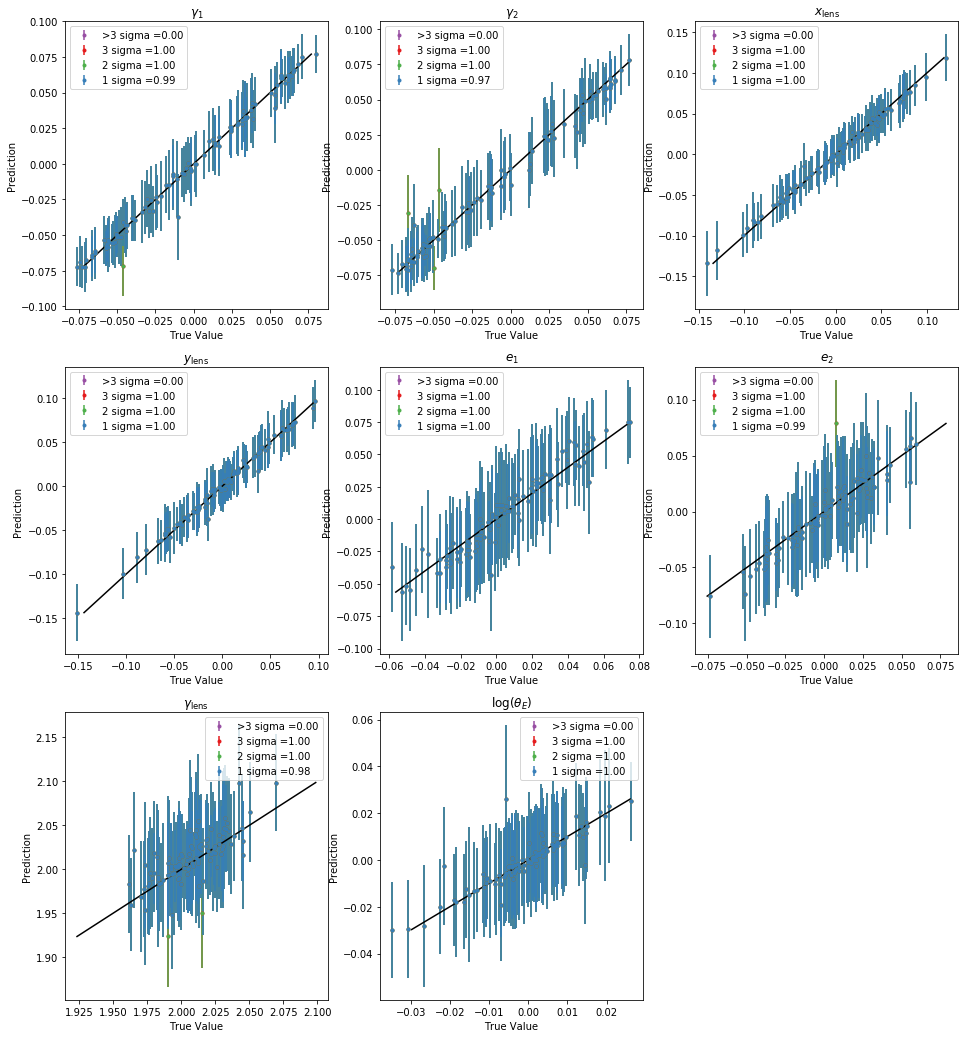

In [6]:
num_lenses = 100
bnn_infer.gen_coverage_plots(num_lenses=num_lenses)

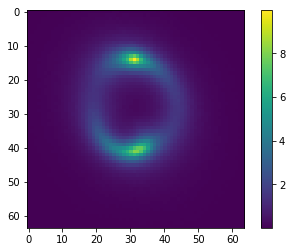

external_shear_g1 -0.064364985
external_shear_g2 -0.026690207
lens_mass_center_x -0.08915691
lens_mass_center_y -0.06674499
lens_mass_e1 -0.021995492
lens_mass_e2 -0.006160721
lens_mass_gamma 2.0016963
lens_mass_theta_E_log 0.013364954


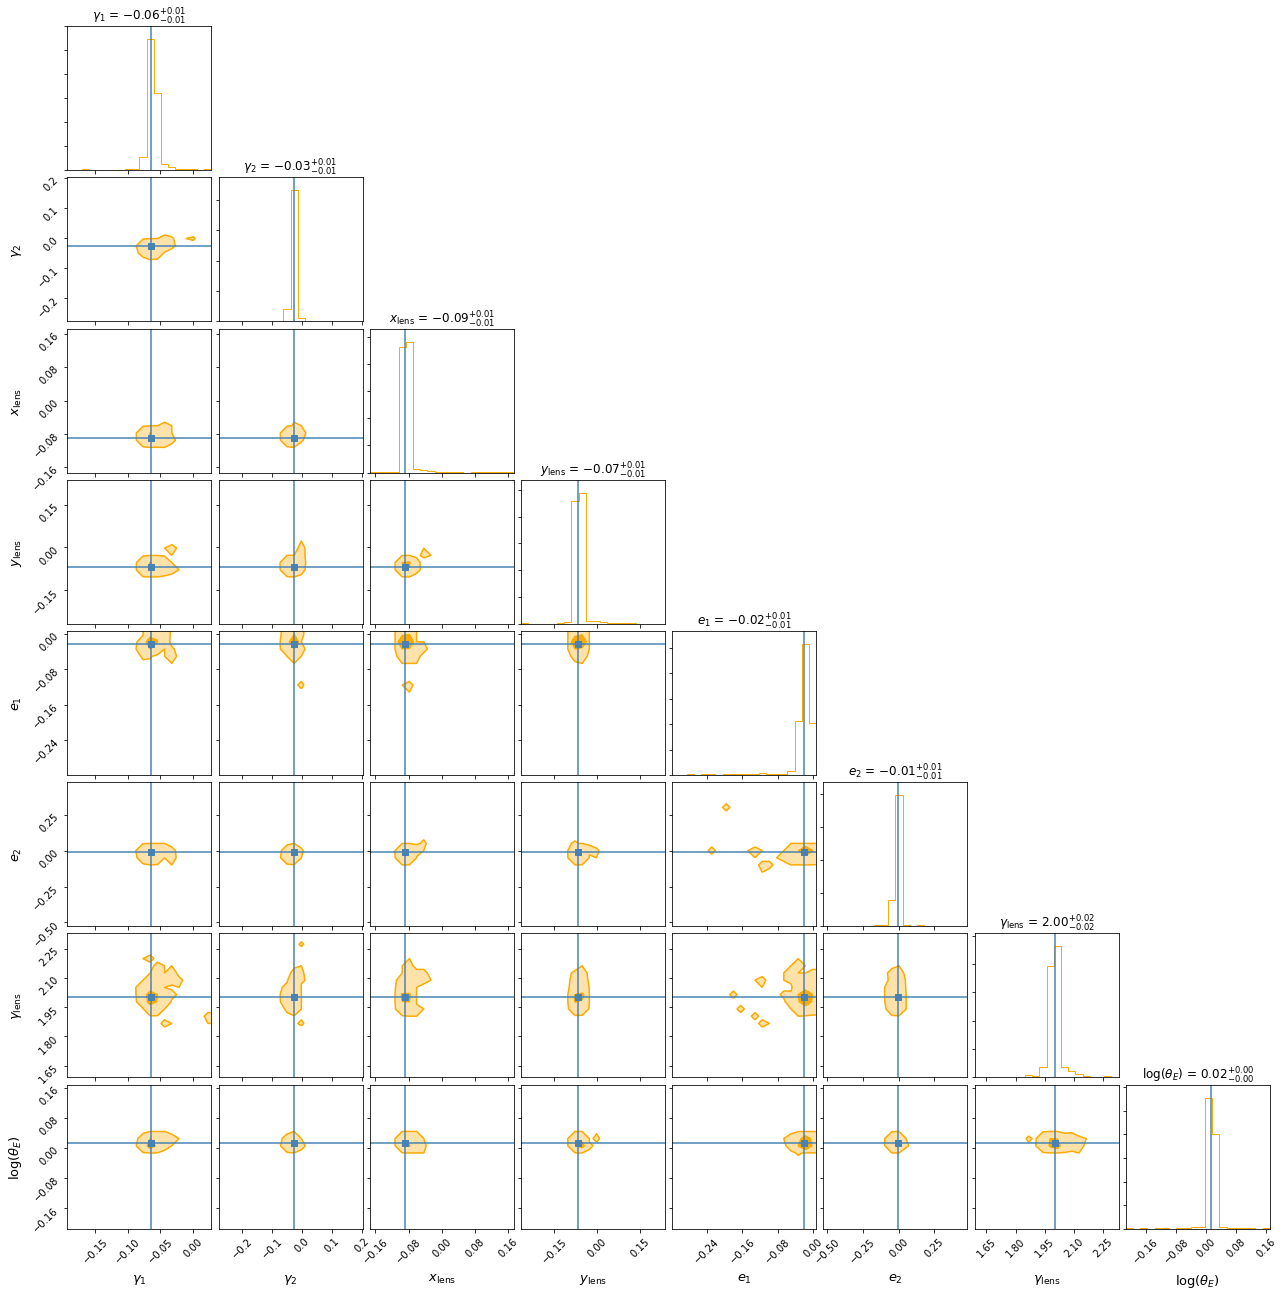

In [21]:
image_index = 8
bnn_infer.plot_posterior_contours(image_index)

3.7397310471015834e-05 0.0030279988918446065


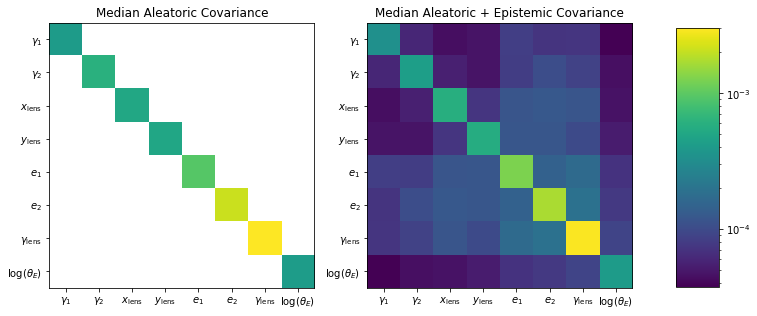

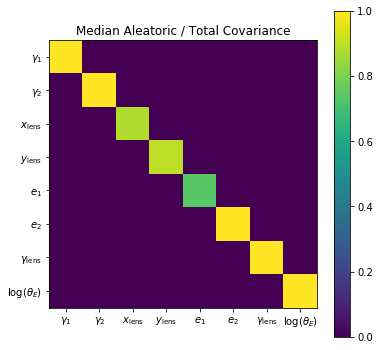

In [32]:
bnn_infer.comp_al_ep_unc()

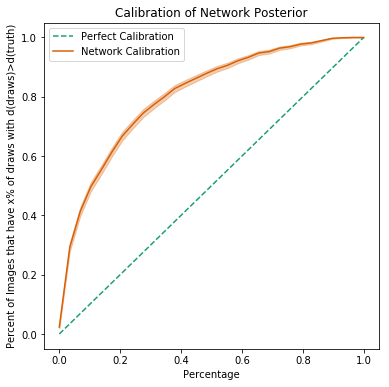

In [8]:
color_map = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

## Full Posterior

In [33]:
# First specify the config path
root_path = '/Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/'
config_path = root_path + 'configs/nn2.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
save_path_nn2 = root_path + 'hierarchical_results/nn2_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn2)

Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/nn2.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/hierarchical_results/nn2_samps/


In [34]:
bnn_infer.report_stats()

Parameter, Median Abs Error, Median Std
external_shear_g1 0.003119723268872894 0.021711030403869958
external_shear_g2 0.0030928477559320506 0.02437940628523466
lens_mass_center_x 0.0023838893485397233 0.02400617203779199
lens_mass_center_y 0.0022856329731204316 0.023779059962650867
lens_mass_e1 0.005606635907924731 0.04080971474580917
lens_mass_e2 0.0057215190799118545 0.04358480493012028
lens_mass_gamma 0.012402240790963193 0.0642320608900412
lens_mass_theta_E_log 0.002008607897217238 0.02002876355279925


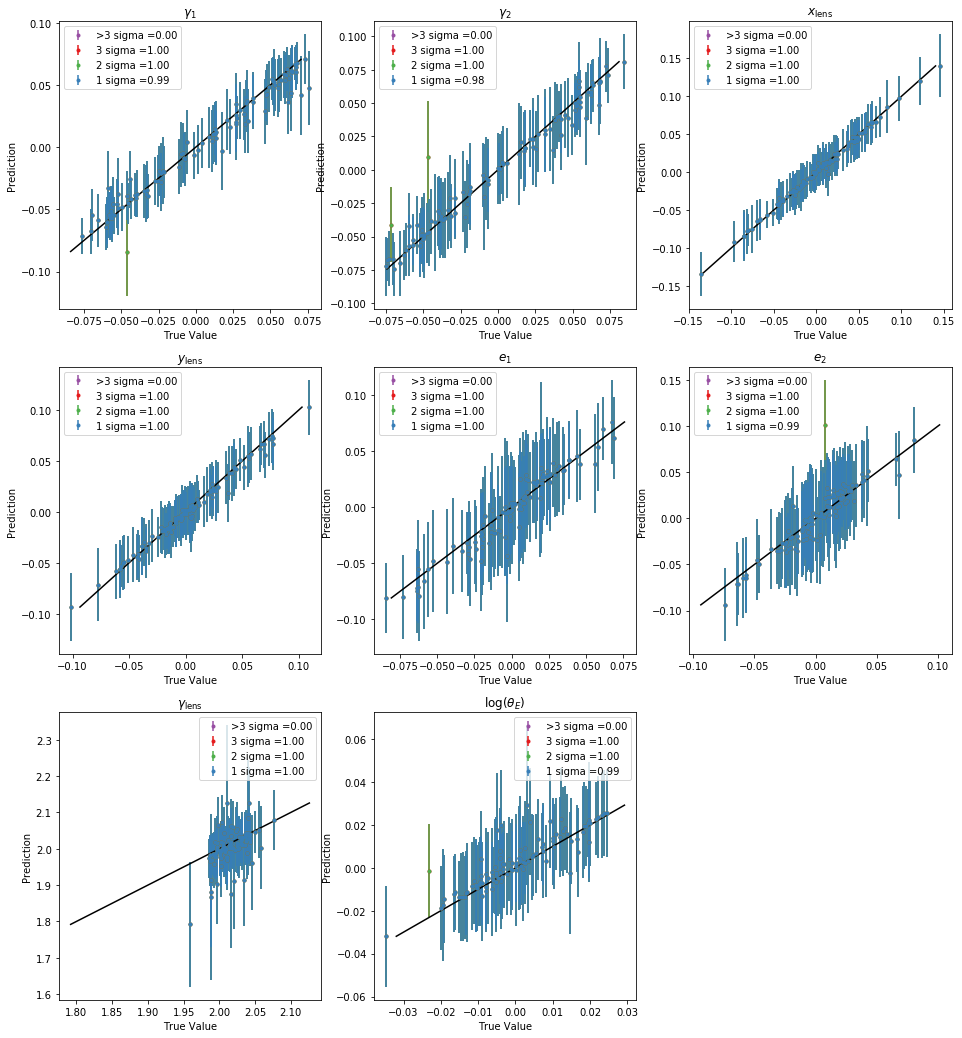

In [37]:
bnn_infer.gen_coverage_plots(num_lenses=num_lenses)

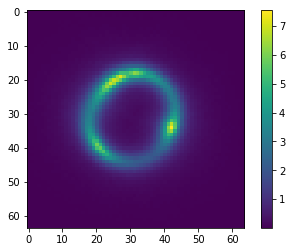

external_shear_g1 -0.024464741
external_shear_g2 -0.06305966
lens_mass_center_x -0.028625775
lens_mass_center_y -0.051288143
lens_mass_e1 0.009173115
lens_mass_e2 -0.01449502
lens_mass_gamma 2.0252705
lens_mass_theta_E_log -0.0010174897


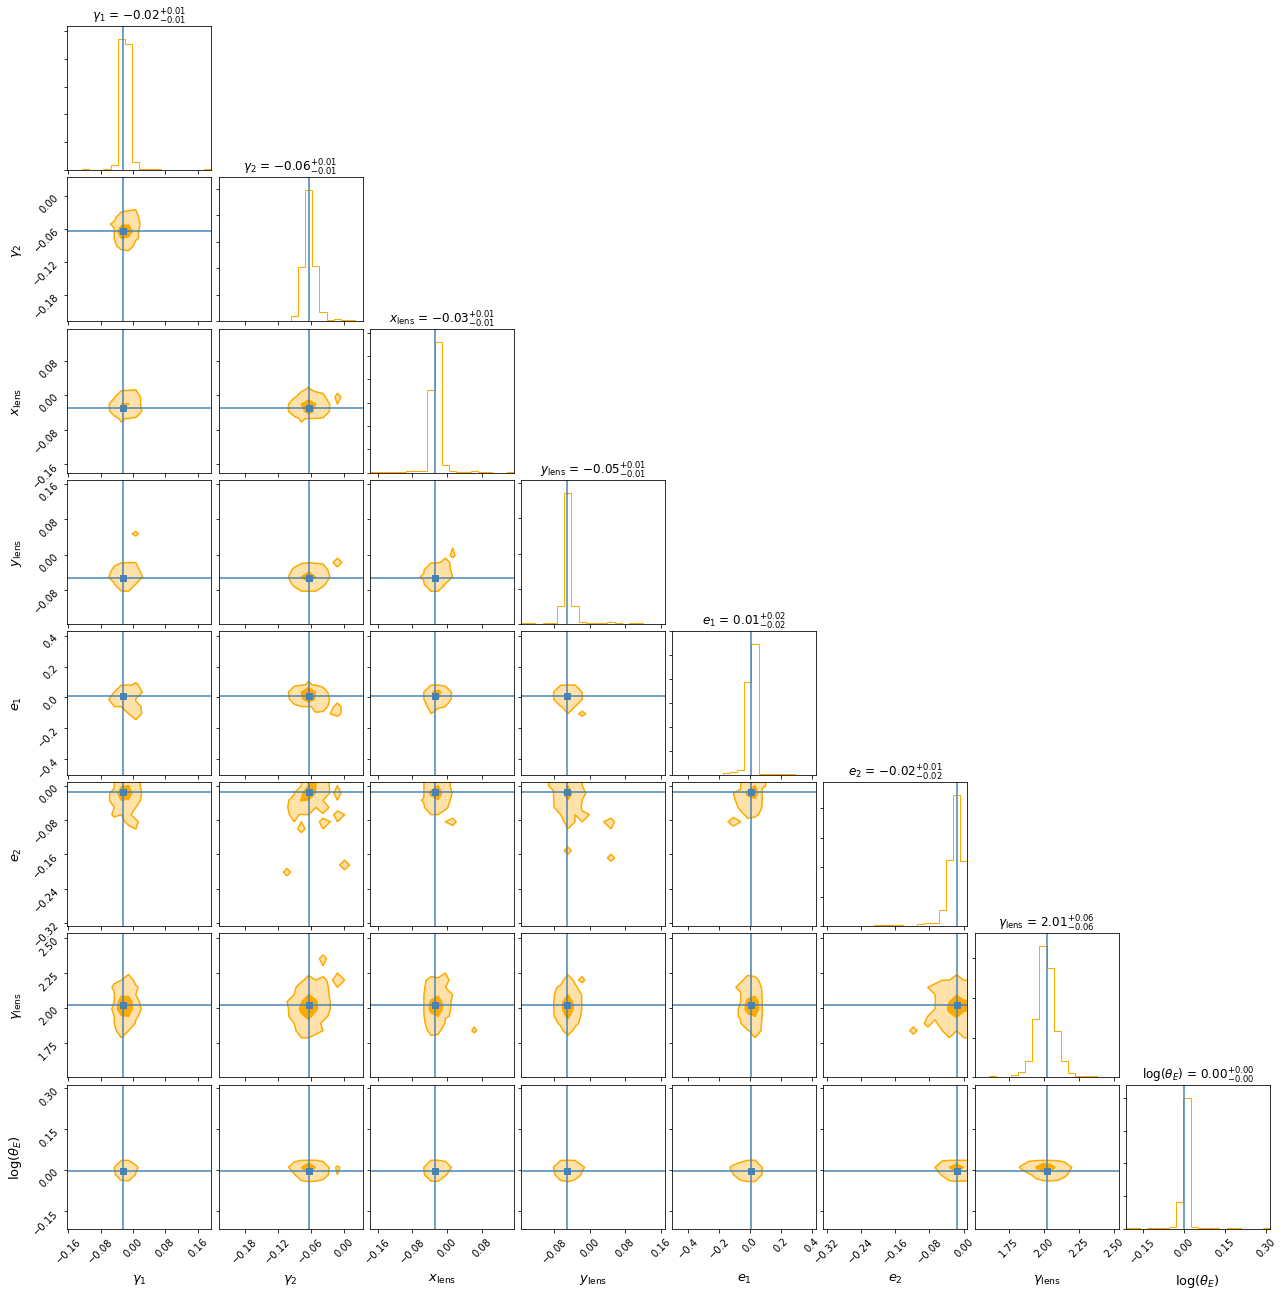

In [38]:
image_index = 20
bnn_infer.plot_posterior_contours(image_index)

6.248739923190948e-06 0.004080086399661589


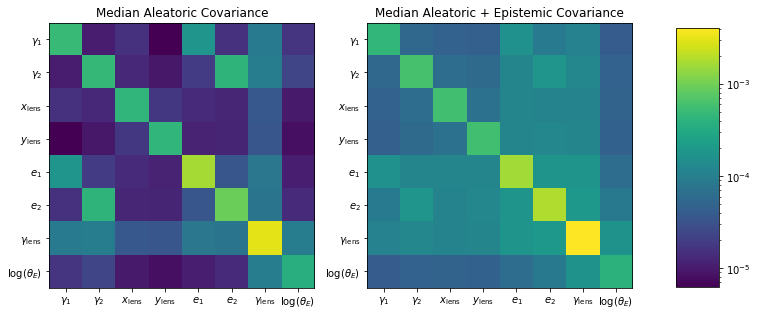

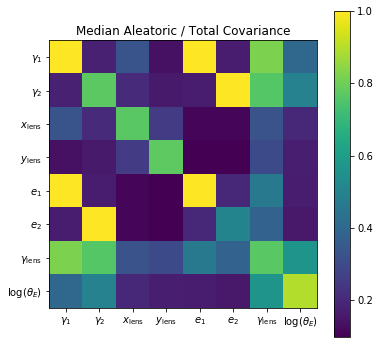

In [39]:
bnn_infer.comp_al_ep_unc()

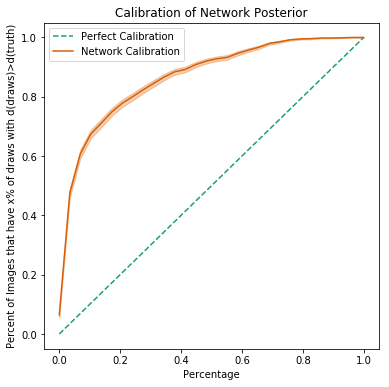

In [40]:
color_map = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

## GM Posterior

In [41]:
# First specify the config path
root_path = '/Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/'
config_path = root_path + 'configs/nn3.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
save_path_nn3 = root_path + 'hierarchical_results/nn3_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn3)

Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/nn3.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/hierarchical_results/nn3_samps/


In [42]:
bnn_infer.report_stats()

Parameter, Median Abs Error, Median Std
external_shear_g1 0.0034739725270036157 0.024352203988260848
external_shear_g2 0.0034823268162577324 0.026910163028788552
lens_mass_center_x 0.0026040944197090214 0.025904183364935718
lens_mass_center_y 0.0027301829130211355 0.02575877680407972
lens_mass_e1 0.006738744824959415 0.04572508612918655
lens_mass_e2 0.006908477189579418 0.04671419311048923
lens_mass_gamma 0.013138646358257677 0.06661510534080871
lens_mass_theta_E_log 0.0022005794901438724 0.022216004616424


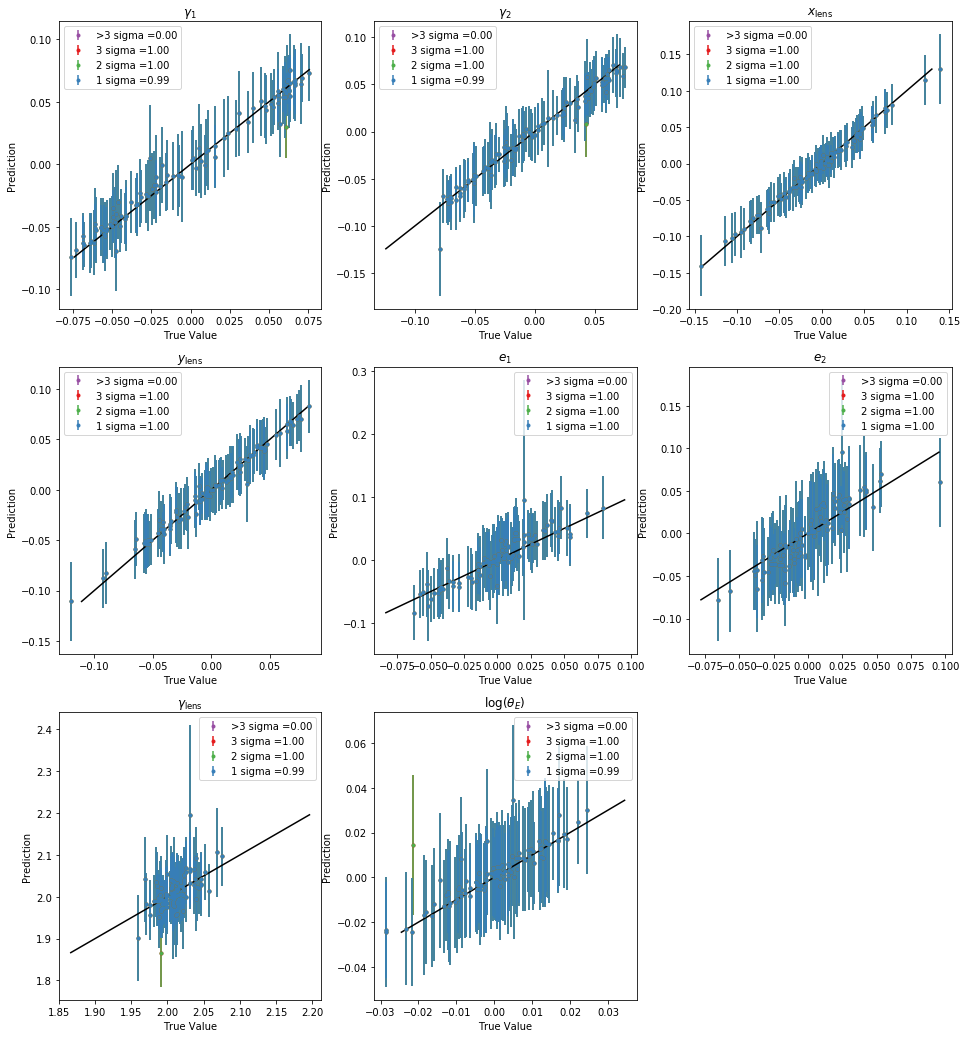

In [43]:
bnn_infer.gen_coverage_plots(num_lenses=num_lenses)

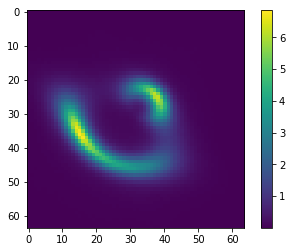

external_shear_g1 0.06270528
external_shear_g2 0.015224149
lens_mass_center_x -0.051460855
lens_mass_center_y -0.090225935
lens_mass_e1 0.009807641
lens_mass_e2 -0.010379399
lens_mass_gamma 1.9973375
lens_mass_theta_E_log 0.0009454201


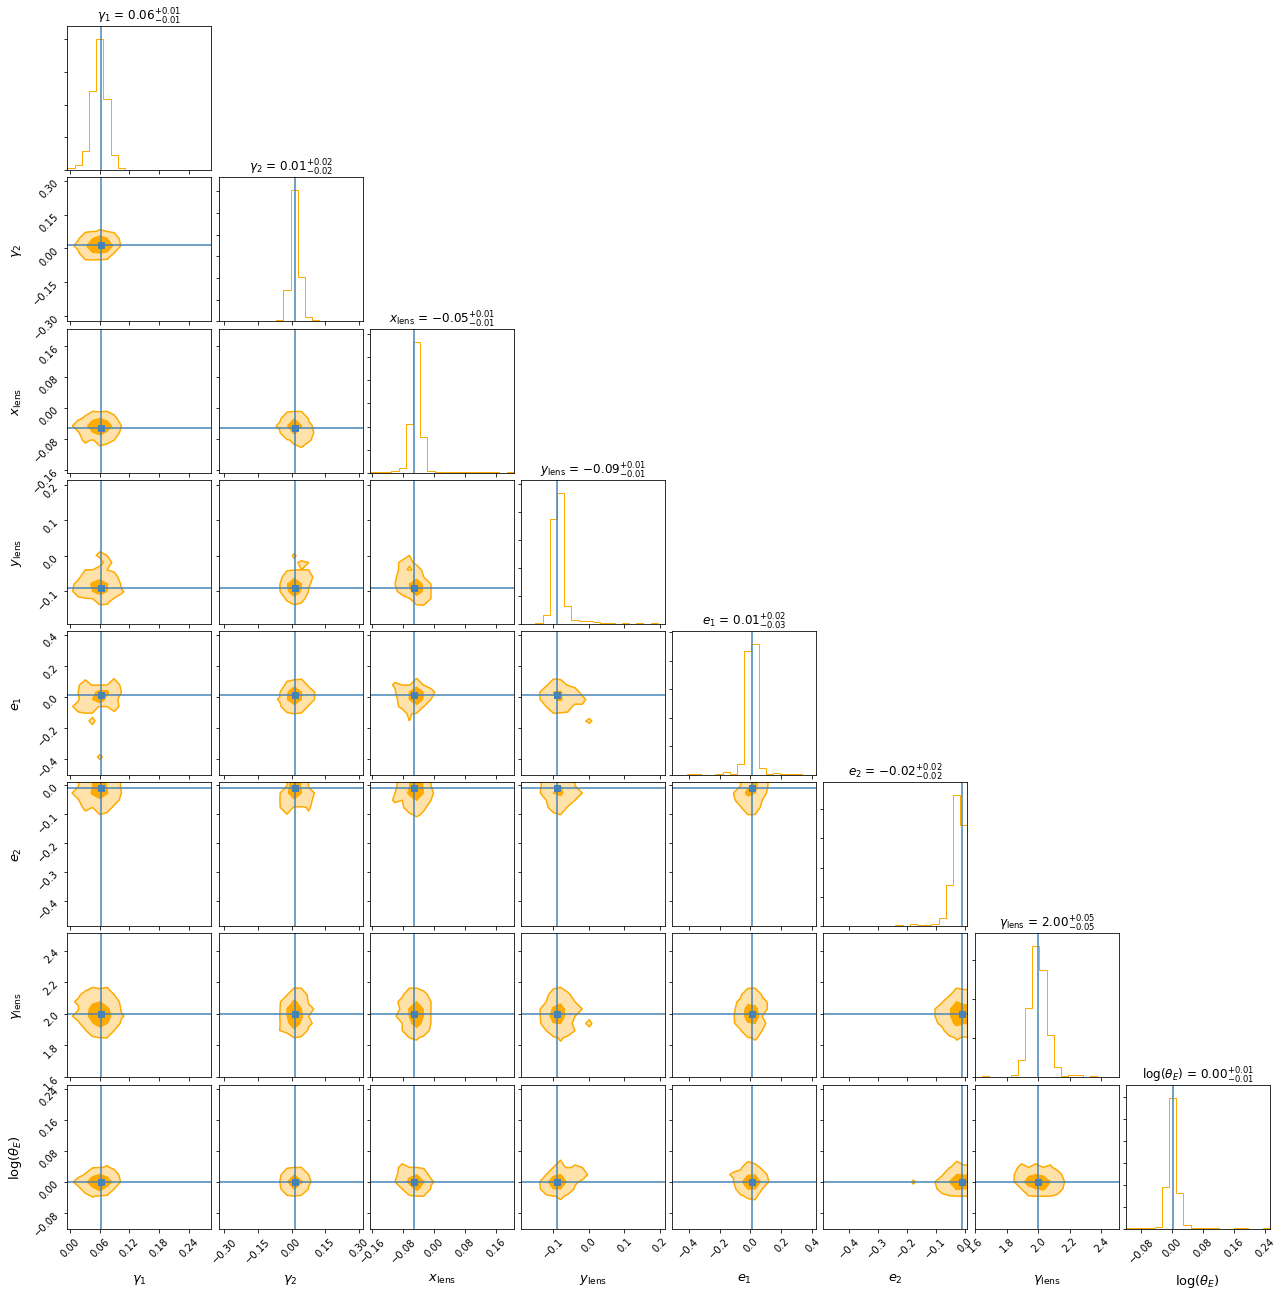

In [44]:
image_index = 20
bnn_infer.plot_posterior_contours(image_index)

6.326279863293832e-06 0.004500689974419618


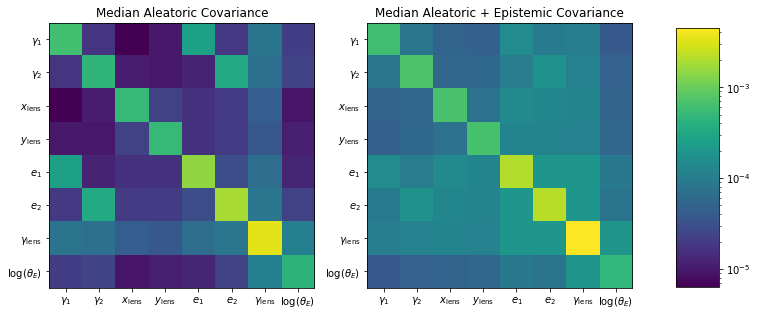

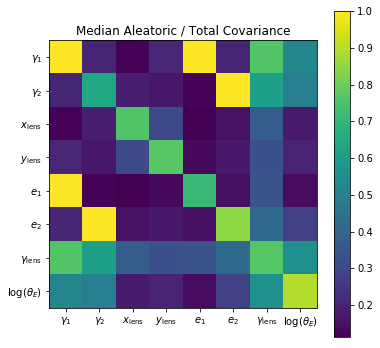

In [45]:
bnn_infer.comp_al_ep_unc()

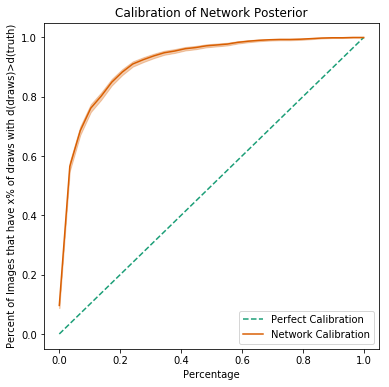

In [46]:
color_map = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

## Combined Plot

Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/nn1.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/hierarchical_results/nn1_samps/
Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/nn2.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/hierarchical_results/nn2_samps/
Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/nn3.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/hierarchical_results/nn3_samps/


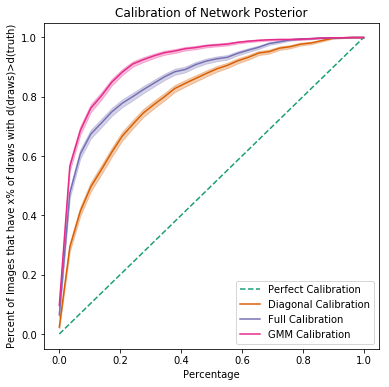

In [47]:
# First specify the config path
config_path = root_path + 'configs/nn1.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
bnn_infer.gen_samples(num_samples,save_path_nn1)

color_map = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

# NN2
config_path = root_path + 'configs/nn2.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn2)
fig = bnn_infer.plot_calibration(color_map=color_map[1:],n_perc_points=n_perc_points,figure=fig,show_plot=False)

# NN3
config_path = root_path + 'configs/nn3.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn3)
fig = bnn_infer.plot_calibration(color_map=color_map[2:],n_perc_points=n_perc_points,figure=fig,show_plot=True,
                                legend=['Perfect Calibration','Diagonal Calibration','Full Calibration',
                                       'GMM Calibration'])